In [6]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("classic")

%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

<ipython-input-6-5b184de292ef>:16: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  n_qubits = circuit.n_qubits


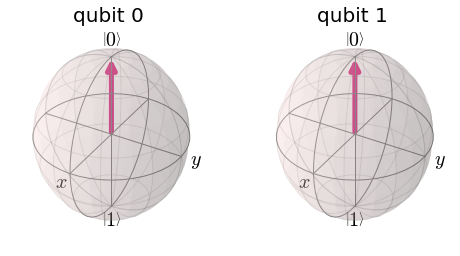

In [7]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)